VISUALIZATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib


In [ ]:
df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset
df

## 🧠 Health & Lifestyle Insights

In [ ]:
#To reveal how strongly continuous health metrics are related to each other and to diabetes risk.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  

# Select continuous health variables
continuous_vars = [
    'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
    'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides',
    'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c',
    'diabetes_risk_score'
]

plt.figure(figsize=(12, 10))
corr_matrix = df[continuous_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Health Metrics')
plt.show()


In [ ]:
#To compare the distribution and spread of glucose levels across different diabetes stages. Great for spotting outliers and variability.

sns.boxplot(x='diabetes_stage', y='glucose_fasting', data=df)
plt.title('Fasting Glucose Distribution by Diabetes Stage')
plt.xlabel('Diabetes Stage')
plt.ylabel('Fasting Glucose Level')
plt.show()


In [ ]:
#To visualize both the distribution and density of sleep hours across diabetes stages. Combines boxplot and KDE for richer insight.
sns.violinplot(x='diabetes_stage', y='sleep_hours_per_day', data=df)
plt.title('Sleep Hours Distribution by Diabetes Stage')
plt.xlabel('Diabetes Stage')
plt.ylabel('Sleep Hours per Day')
plt.show()


In [ ]:
#To explore relationships between two variables (e.g., BMI and glucose) and highlight clustering by diabetes stage.
sns.scatterplot(x='bmi', y='glucose_fasting', hue='diabetes_stage', data=df, palette='Set2')
plt.title('BMI vs. Fasting Glucose by Diabetes Stage')
plt.xlabel('BMI')
plt.ylabel('Fasting Glucose Level')
plt.legend(title='Diabetes Stage')
plt.show()


In [ ]:
#To explore pairwise relationships among multiple health indicators and detect patterns or clusters across diabetes stages.
selected_vars = ['bmi', 'glucose_fasting', 'insulin_level', 'hba1c', 'diabetes_risk_score']
sns.pairplot(df[selected_vars + ['diabetes_stage']], hue='diabetes_stage', palette='husl')
plt.suptitle('Pairwise Relationships of Health Indicators', y=1.02)
plt.show()


## 🧬 Diabetes Risk & Progression

In [ ]:
#To show how many individuals fall into each diabetes stage and how many are diagnosed vs. undiagnosed.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  

# Count per diabetes stage
plt.figure(figsize=(8, 5))
sns.countplot(x='diabetes_stage', data=df, palette='viridis')
plt.title('Count of Individuals per Diabetes Stage')
plt.xlabel('Diabetes Stage')
plt.ylabel('Count')
plt.show()

# Diagnosed vs. Undiagnosed
plt.figure(figsize=(8, 5))
sns.countplot(x='diagnosed_diabetes', data=df, palette='Set2')
plt.title('Distribution of Diagnosed vs. Undiagnosed Diabetes')
plt.xlabel('Diagnosed Diabetes (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


In [ ]:
df

In [ ]:
#To show how diabetes stages are distributed across demographic groups like ethnicity, education, income, or employment.
import matplotlib.pyplot as plt

# Copy the dataframe to avoid modifying the original
df_ethnicity = df.copy()

# Group by ethnicity and diabetes stage, then count occurrences
stage_ethnicity = df_ethnicity.groupby(['ethnicity', 'diabetes_stage']).size().unstack().fillna(0)

# Plot the distribution
stage_ethnicity.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.title('Diabetes Stage Distribution by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.legend(title='Diabetes Stage')
plt.tight_layout()
plt.show()


In [ ]:
#To show how diabetes risk score trends across age or lifestyle index.
import matplotlib.pyplot as plt
import seaborn as sns

# Recreate df_lifestyle with lifestyle_index
df_lifestyle = df.copy()

# Map smoking status to scores
smoking_map = {'Never': 2, 'Former': 1, 'Current': 0}
df_lifestyle['smoking_score'] = df_lifestyle['smoking_status'].map(smoking_map)

# Invert alcohol consumption: less is healthier
df_lifestyle['alcohol_score'] = df_lifestyle['alcohol_consumption_per_week'].apply(lambda x: max(0, 4 - x))

# Normalize physical activity and diet score
df_lifestyle['activity_score'] = df_lifestyle['physical_activity_minutes_per_week'] / df_lifestyle['physical_activity_minutes_per_week'].max()
df_lifestyle['diet_score_norm'] = df_lifestyle['diet_score'] / df_lifestyle['diet_score'].max()

# Compute lifestyle index
df_lifestyle['lifestyle_index'] = (
    df_lifestyle['smoking_score'] +
    df_lifestyle['alcohol_score'] +
    df_lifestyle['activity_score'] +
    df_lifestyle['diet_score_norm']
)

# Sort and plot
df_lifestyle_sorted = df_lifestyle.sort_values('lifestyle_index')

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df_lifestyle_sorted,
    x='lifestyle_index',
    y='diabetes_risk_score',
    errorbar=None  # replaces ci=None
)
plt.title('Diabetes Risk Score Across Lifestyle Index')
plt.xlabel('Lifestyle Index')
plt.ylabel('Diabetes Risk Score')
plt.tight_layout()
plt.show()



In [ ]:
#To compare lifestyle profiles (diet, sleep, exercise, screen time) across diabetes stages.

import plotly.graph_objects as go

# Define lifestyle variables
lifestyle_vars = ['diet_score', 'sleep_hours_per_day', 'physical_activity_minutes_per_week', 'screen_time_hours_per_day']

# Normalize each lifestyle variable (0–1 scale)
df_normalized = df.copy()
for col in lifestyle_vars:
    max_val = df_normalized[col].max()
    df_normalized[col] = df_normalized[col] / max_val if max_val != 0 else 0

# Compute average normalized lifestyle metrics per diabetes stage
df_radar = df_normalized.groupby('diabetes_stage')[lifestyle_vars].mean().reset_index()

# Create radar chart
fig = go.Figure()

for _, row in df_radar.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[lifestyle_vars].values,
        theta=lifestyle_vars,
        fill='toself',
        name=row['diabetes_stage']
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    title='Normalized Lifestyle Profile by Diabetes Stage',
    showlegend=True
)

fig.show()



## 🧍 Demographic & Socioeconomic Patterns

In [ ]:
#To compare diabetes prevalence across key demographic groups like ethnicity, income, education, and employment status.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Process_data/diabetes_final_standardized.csv')

# Check if 'ethnicity' column exists
if 'ethnicity' not in df.columns:
    raise ValueError("Column 'ethnicity' not found in the dataset.")

# Grouped bar chart: diabetes prevalence by ethnicity
ethnicity_counts = df.groupby(['ethnicity', 'diagnosed_diabetes']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='ethnicity', y='count', hue='diagnosed_diabetes', data=ethnicity_counts, palette='Set2')
plt.title('Diabetes Diagnosis by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.legend(title='Diagnosed (1=Yes, 0=No)')
plt.tight_layout()
plt.show()


In [ ]:
df

In [ ]:
#To show hierarchical relationships between demographics and diabetes stages. Ideal for understanding layered patterns.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Process_data/diabetes_final_standardized.csv')

# Use existing categorical columns directly
df['ethnicity'] = df['ethnicity']
df['education'] = df['education_level']
df['income'] = df['income_level']

# Group and count
grouped = df.groupby(['ethnicity', 'income', 'education', 'diabetes_stage']).size().reset_index(name='count')

# Plot using FacetGrid
g = sns.FacetGrid(grouped, col='ethnicity', row='income', margin_titles=True, height=3.5)
g.map_dataframe(sns.barplot, x='education', y='count', hue='diabetes_stage', palette='Set2')
g.set_axis_labels("Education Level", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(title='Diabetes Stage')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Diabetes Stage Breakdown by Ethnicity → Income → Education")
plt.show()



In [ ]:
#To visualize relationships between categorical variables like smoking status, BMI category, and diabetes diagnosis.

from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Use existing categorical columns directly
df['smoking'] = df['smoking_status']
df['bmi_cat'] = df['bmi_category']
df['diagnosed'] = df['diagnosed_diabetes'].map({0: 'No', 1: 'Yes'})

# Mosaic plot
plt.figure(figsize=(10, 6))
mosaic(df, ['smoking', 'bmi_cat', 'diagnosed'])
plt.title('Mosaic Plot: Smoking vs. BMI Category vs. Diabetes Diagnosis')
plt.tight_layout()
plt.show()


## 🏃 Lifestyle Behavior Analysis

<>:6: SyntaxWarning:

invalid escape sequence '\d'

<>:6: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Legion\AppData\Local\Temp\ipykernel_30328\2664691482.py:6: SyntaxWarning:

invalid escape sequence '\d'



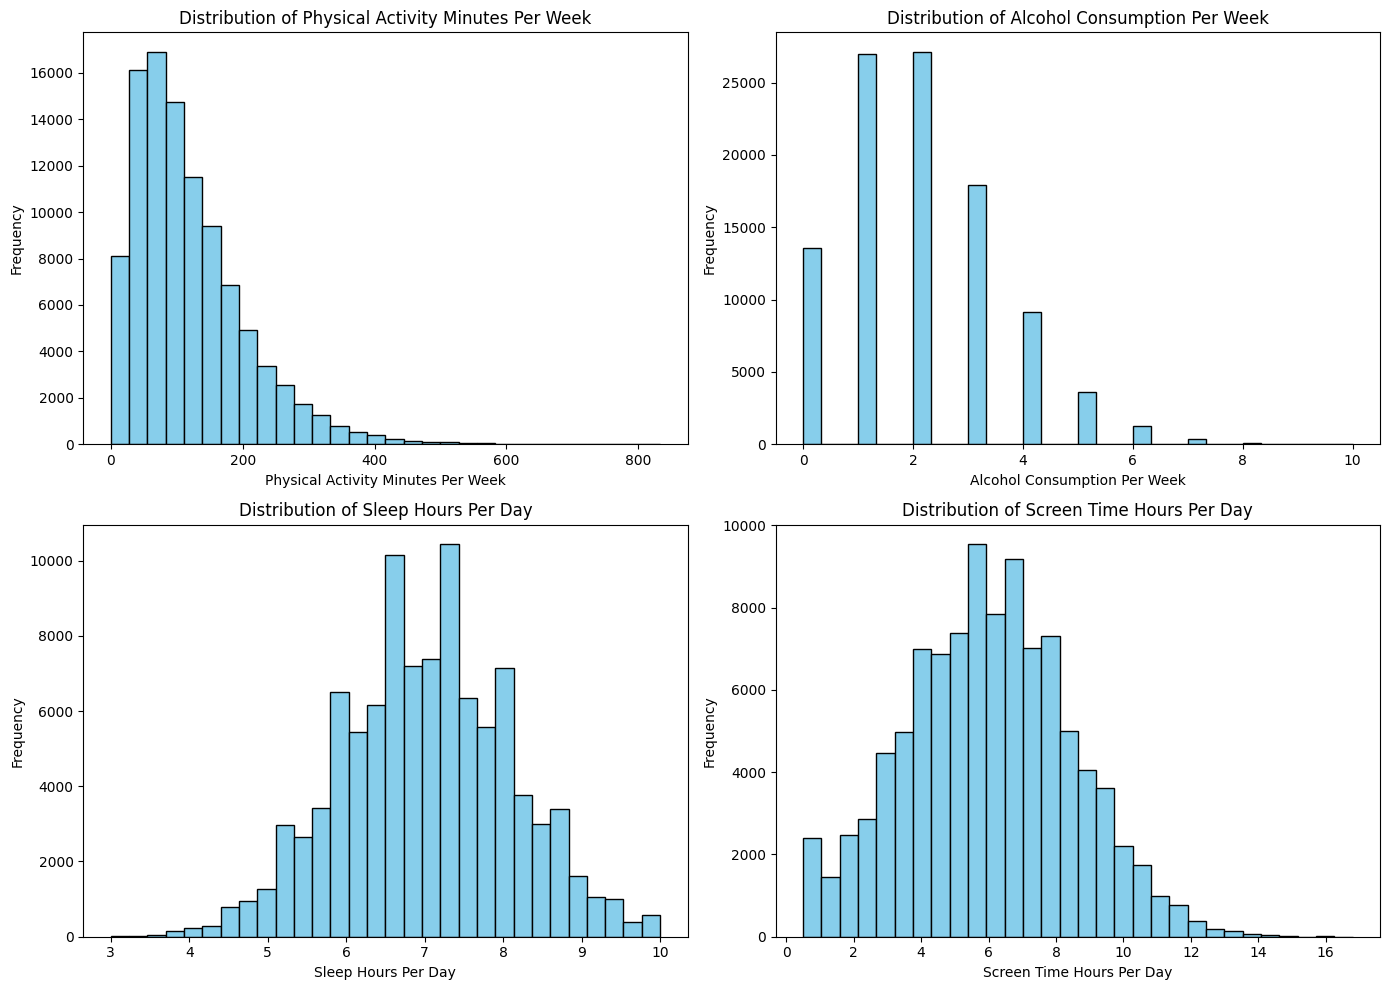

In [18]:
#To show the distribution of lifestyle behaviors such as physical activity, alcohol consumption, sleep hours, and screen time. This helps identify common patterns and outliers.

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset

# List of lifestyle variables
lifestyle_vars = [
    'physical_activity_minutes_per_week',
    'alcohol_consumption_per_week',
    'sleep_hours_per_day',
    'screen_time_hours_per_day'
]

# Plot histograms
plt.figure(figsize=(14, 10))
for i, var in enumerate(lifestyle_vars, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {var.replace("_", " ").title()}')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
#To visualize the smooth distribution of lifestyle variables. These plots are useful for comparing distributions across diabetes stages.

import seaborn as sns

# Density plots for each lifestyle variable
plt.figure(figsize=(14, 10))
for i, var in enumerate(lifestyle_vars, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df, x=var, hue='diabetes_stage', fill=True, common_norm=False, palette='Set2')
    plt.title(f'Density Plot of {var.replace("_", " ").title()} by Diabetes Stage')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
#To explore the relationship between lifestyle index and diabetes risk score, with bubble size representing BMI or age. This reveals clustering and impact of lifestyle on risk.

import matplotlib.pyplot as plt
import seaborn as sns

# Make sure lifestyle_index is computed
df_lifestyle = df.copy()

# Map smoking status to scores
smoking_map = {'Never': 2, 'Former': 1, 'Current': 0}
df_lifestyle['smoking_score'] = df_lifestyle['smoking_status'].map(smoking_map)

# Invert alcohol consumption: less is healthier
df_lifestyle['alcohol_score'] = df_lifestyle['alcohol_consumption_per_week'].apply(lambda x: max(0, 4 - x))

# Normalize physical activity and diet score
df_lifestyle['activity_score'] = df_lifestyle['physical_activity_minutes_per_week'] / df_lifestyle['physical_activity_minutes_per_week'].max()
df_lifestyle['diet_score_norm'] = df_lifestyle['diet_score'] / df_lifestyle['diet_score'].max()

# Compute lifestyle index
df_lifestyle['lifestyle_index'] = (
    df_lifestyle['smoking_score'] +
    df_lifestyle['alcohol_score'] +
    df_lifestyle['activity_score'] +
    df_lifestyle['diet_score_norm']
)

# Bubble chart: Lifestyle Index vs. Risk Score, bubble size = BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='lifestyle_index',
    y='diabetes_risk_score',
    size='bmi',
    hue='diabetes_stage',
    data=df_lifestyle,
    palette='coolwarm',
    sizes=(20, 200),
    alpha=0.6
)
plt.title('Lifestyle Index vs. Diabetes Risk Score (Bubble Size = BMI)')
plt.xlabel('Lifestyle Index')
plt.ylabel('Diabetes Risk Score')
plt.legend(title='Diabetes Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Bubble chart: Lifestyle Index vs. Risk Score, bubble size = Age
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='lifestyle_index',
    y='diabetes_risk_score',
    size='age',
    hue='diabetes_stage',
    data=df_lifestyle,
    palette='viridis',
    sizes=(20, 200),
    alpha=0.6
)
plt.title('Lifestyle Index vs. Diabetes Risk Score (Bubble Size = Age)')
plt.xlabel('Lifestyle Index')
plt.ylabel('Diabetes Risk Score')
plt.legend(title='Diabetes Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 

## 🩺 Clinical Risk Factors

In [ ]:
#To visualize multiple clinical metrics (blood pressure, cholesterol, glucose, insulin) across diabetes stages. This helps identify patterns and clusters among individuals.

import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset

# Select relevant clinical features
clinical_vars = [
    'systolic_bp', 'diastolic_bp', 'cholesterol_total',
    'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides',
    'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c'
]

# Normalize for better visual comparison
df_norm = df.copy()
df_norm[clinical_vars] = (df_norm[clinical_vars] - df_norm[clinical_vars].min()) / (df_norm[clinical_vars].max() - df_norm[clinical_vars].min())
df_norm['diabetes_stage'] = df['diabetes_stage'].astype(str)

# Plot
plt.figure(figsize=(14, 6))
parallel_coordinates(df_norm[['diabetes_stage'] + clinical_vars], 'diabetes_stage', colormap='viridis', alpha=0.4)
plt.title('Parallel Coordinates Plot of Clinical Metrics by Diabetes Stage')
plt.xticks(rotation=45)
plt.show()


## 🧩 Advanced & Interactive Visuals


In [ ]:
#To reduce high-dimensional data into 2D space for visualizing clusters of individuals based on all features. This helps reveal natural groupings by diabetes stage or risk.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset

# Select numeric features only (excluding target and one-hot columns)
exclude_cols = ['diabetes_stage', 'diagnosed_diabetes']
numeric_cols = df.select_dtypes(include='number').columns.difference(exclude_cols)
X = df[numeric_cols]

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['diabetes_stage'] = df['diabetes_stage']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='diabetes_stage', palette='Set2', alpha=0.7)
plt.title('PCA: Clustering Individuals by Clinical & Lifestyle Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diabetes Stage')
plt.show()


In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

# Create DataFrame for plotting
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne['diabetes_stage'] = df['diabetes_stage']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='diabetes_stage', palette='Set1', alpha=0.7)
plt.title('t-SNE: Clustering Individuals by Clinical & Lifestyle Features')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Diabetes Stage')
plt.show()


In [ ]:
#To combine multiple charts into a dynamic dashboard that allows filtering by age, gender, ethnicity, etc. Perfect for stakeholder engagement and exploratory analysis.

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
import seaborn as sns

# Load dataset
df = pd.read_csv('Process_data/diabetes_final_standardized.csv')

# Use existing ethnicity column directly
if 'ethnicity' not in df.columns:
    raise ValueError("Column 'ethnicity' not found in the dataset.")

# Initial ethnicity
initial_ethnicity = df['ethnicity'].dropna().unique()[0]

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(left=0.3)

# Radio buttons for ethnicity filter
ax_radio = plt.axes([0.05, 0.4, 0.15, 0.4])
radio = RadioButtons(ax_radio, df['ethnicity'].dropna().unique(), active=0)

def update_dashboard(selected_ethnicity):
    filtered_df = df[df['ethnicity'] == selected_ethnicity]

    # Clear previous plots
    ax1.clear()
    ax2.clear()

    # Plot 1: Age vs. Diabetes Risk Score
    sns.scatterplot(data=filtered_df, x='age', y='diabetes_risk_score', hue='diabetes_stage', ax=ax1, palette='Set2')
    ax1.set_title(f'Diabetes Risk Score by Age ({selected_ethnicity})')
    ax1.set_xlabel('Age')
    ax1.set_ylabel('Risk Score')

    # Plot 2: BMI vs. Glucose Fasting (Bubble Size = Age)
    scatter = ax2.scatter(
        filtered_df['bmi'], filtered_df['glucose_fasting'],
        s=filtered_df['age'] * 10,
        c=filtered_df['diabetes_stage'].astype('category').cat.codes,  # convert to numeric
        cmap='viridis', alpha=0.6
    )
    ax2.set_title(f'BMI vs. Fasting Glucose ({selected_ethnicity})')
    ax2.set_xlabel('BMI')
    ax2.set_ylabel('Fasting Glucose')

    fig.canvas.draw_idle()

# Initial plot
update_dashboard(initial_ethnicity)

# Connect radio button to update function
radio.on_clicked(update_dashboard)

plt.show()

   
    
